**SDE Assignment - Feb 2025**

**Name -** Anil kuskwaha

**Enail -** kumaranil48309@gmail.com

In [1]:
from google.colab import files

print("Please upload PDF files :")  # server_log
uploaded = files.upload()
log_file_name = list(uploaded.keys())[0]

Please upload 1st PDF files :


Saving server_log.txt to server_log.txt


# **Question 1**

**Write a program which reads this log file and produces two histograms.**

In [2]:
import re
from collections import defaultdict
from datetime import datetime

# Regular expression to extract IP and timestamp
LOG_PATTERN = r'(?P<ip>\d+\.\d+\.\d+\.\d+) - - \[(?P<timestamp>[^\]]+)\]'

def parse_log(file_path):
    ip_counts = defaultdict(int)    # Store IP occurrences
    hourly_counts = defaultdict(int)  # Store visitors per hour

    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(LOG_PATTERN, line)
            if match:
                ip = match.group("ip")
                timestamp = match.group("timestamp")

                # Convert timestamp to datetime object
                log_time = datetime.strptime(timestamp, "%d/%b/%Y:%H:%M:%S %z")
                hour = log_time.strftime("%H")  # Extract hour (HH)

                # Update counts
                ip_counts[ip] += 1
                hourly_counts[hour] += 1

    return ip_counts, hourly_counts

# Call the function with uploaded file
ip_counts, hourly_counts = parse_log(log_file_name)

**1. To show distinct IP addresses that hit the server on a given day.**

In [3]:
def generate_ip_histogram(ip_counts):
    print("\nIP Address        | Occurrences")
    print("---------------------------------")
    for ip, count in sorted(ip_counts.items(), key=lambda x: x[1], reverse=True):
        print(f"{ip:17} | {count}")

generate_ip_histogram(ip_counts)

Streaming output truncated to the last 5000 lines.
155.211.7.13      | 1
102.160.9.102     | 1
75.219.198.79     | 1
131.2.144.141     | 1
80.242.134.157    | 1
87.104.167.197    | 1
121.103.28.71     | 1
154.77.104.126    | 1
159.24.123.33     | 1
153.66.167.70     | 1
70.248.173.40     | 1
12.98.121.160     | 1
10.152.170.26     | 1
252.144.164.16    | 1
77.110.238.42     | 1
15.247.50.81      | 1
59.15.123.127     | 1
117.173.33.158    | 1
198.133.238.103   | 1
173.217.111.249   | 1
151.23.16.27      | 1
99.250.191.184    | 1
233.166.208.213   | 1
93.42.117.30      | 1
15.31.88.118      | 1
117.39.201.56     | 1
164.146.43.10     | 1
158.46.164.22     | 1
231.153.23.31     | 1
67.26.208.83      | 1
147.14.112.84     | 1
185.89.231.241    | 1
121.207.33.31     | 1
20.249.243.44     | 1
173.217.119.229   | 1
137.0.16.197      | 1
58.70.120.159     | 1
232.212.17.146    | 1
247.127.229.241   | 1
78.114.20.183     | 1
57.69.66.31       | 1
33.134.99.240     | 1
216.12.235.167    | 1
231

**2. To show the hourly traffic on a given day.**

In [4]:
def generate_hourly_histogram(hourly_counts):
    print("\nHour  | Visitors")
    print("--------------------")
    for hour, count in sorted(hourly_counts.items()):
        print(f"{hour:5} | {count}")

generate_hourly_histogram(hourly_counts)



Hour  | Visitors
--------------------
00    | 643
01    | 635
02    | 617
03    | 635
04    | 686
05    | 659
06    | 592
07    | 621
08    | 610
09    | 600
10    | 615
11    | 638
12    | 606
13    | 631
14    | 580
15    | 633
16    | 622
17    | 645
18    | 617
19    | 627
20    | 603
21    | 603
22    | 647
23    | 635


# **Question 2**

**1. List the IP addresses that contribute to 85% of the traffic on a given day.**

In [5]:
def find_top_ips(ip_counts):
    total_requests = sum(ip_counts.values())  # Total requests
    sorted_ips = sorted(ip_counts.items(), key=lambda x: x[1], reverse=True)  # Sort by occurrences

    top_ips = []
    cumulative = 0

    for ip, count in sorted_ips:
        cumulative += count
        top_ips.append(ip)
        if cumulative / total_requests >= 0.85:  # Stop when reaching 85%
            break

    print("\nTop IPs contributing to 85% of traffic:")
    print("\n".join(top_ips))

# Call function
find_top_ips(ip_counts)


Top IPs contributing to 85% of traffic:
10.50.108.12
10.22.174.100
10.54.51.147
10.200.235.145
10.54.126.70
10.157.192.12
10.66.79.126
10.71.58.65
10.31.73.85
10.63.204.75
10.94.16.132
10.93.250.184
10.161.149.154
10.86.254.202
10.52.142.35
10.243.195.43
10.216.240.115
10.139.71.2
10.81.94.254
10.108.86.196
10.186.216.80
10.33.78.184
10.35.87.188
10.83.203.204
10.9.212.61
10.120.148.77
10.106.167.55
10.12.190.159
10.9.132.49
10.59.119.203
10.68.49.1
10.27.183.42
10.123.242.12
10.147.30.159
10.34.125.180
10.118.183.247
10.212.40.129
10.148.224.212
10.210.215.50
10.223.51.158
10.34.53.209
10.61.174.217
10.86.51.234
10.246.85.112
10.145.44.167
10.85.127.144
10.84.110.148
10.86.137.195
10.76.54.114
10.209.224.55
10.202.25.136
10.134.45.53
10.135.60.145
10.158.118.170
10.71.112.12
10.206.172.28
10.138.186.240
10.102.144.44
10.111.16.123
10.6.51.186
10.15.131.199
10.237.50.171
10.77.4.96
10.80.203.211
10.231.16.201
10.44.119.82
10.45.52.13
10.47.128.62
10.228.140.190
10.8.141.37
10.250.112.

**2. List the hours contributing to the 70% of overall traffic on a given day.**

In [6]:
def find_top_hours(hourly_counts):
    total_hourly = sum(hourly_counts.values())  # Total hourly traffic
    sorted_hours = sorted(hourly_counts.items(), key=lambda x: x[1], reverse=True)  # Sort by visitors

    top_hours = []
    cumulative = 0

    for hour, count in sorted_hours:
        cumulative += count
        top_hours.append(hour)
        if cumulative / total_hourly >= 0.70:  # Stop when reaching 70%
            break

    print("\nTop Hours contributing to 70% of traffic:")
    print(", ".join(top_hours))

# Call function
find_top_hours(hourly_counts)


Top Hours contributing to 70% of traffic:
04, 05, 22, 17, 00, 11, 03, 23, 01, 15, 13, 19, 16, 07, 18, 02, 10


# **Question 3**

**Extra Credit. Create a dashboard to show the data in a browser.**

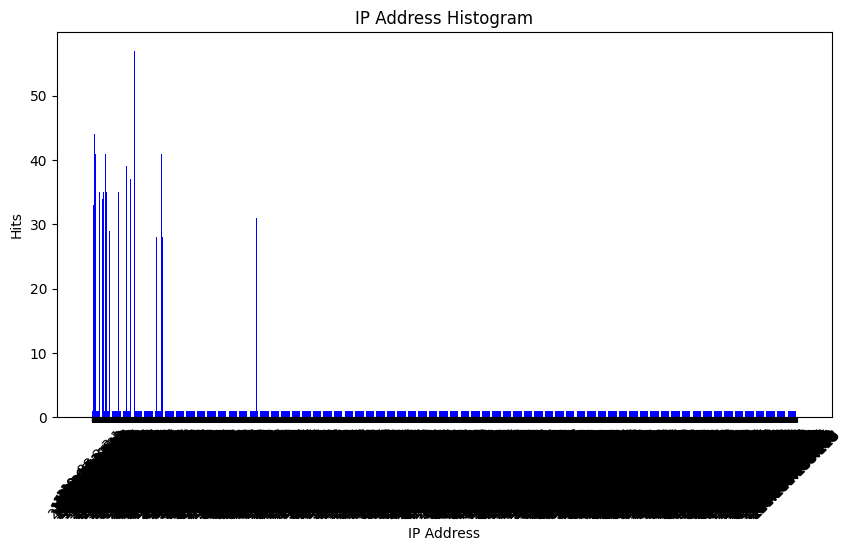

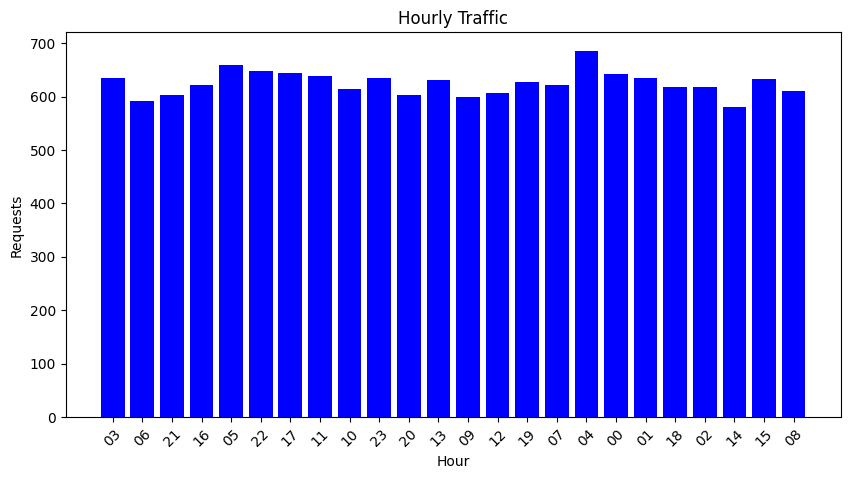

In [7]:
import matplotlib.pyplot as plt

# Function to plot histogram
def plot_histogram(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 5))
    plt.bar(data.keys(), data.values(), color='blue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)  # Rotate labels for readability
    plt.show()

# Plot IP Histogram
plot_histogram(ip_counts, "IP Address Histogram", "IP Address", "Hits")

# Plot Hourly Traffic Histogram
plot_histogram(hourly_counts, "Hourly Traffic", "Hour", "Requests")